In [39]:
import rasterio
import rasterio.plot
import pyproj
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [40]:
#print('Landsat on AWS:')
filepath = 'C:/Users/nisht/Downloads/example.TIF'
with rasterio.open(filepath) as src:
    #print(src.profile)
    print(src.profile)
    print(src.indexes)
    print(src.bounds)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 1992, 'height': 2423, 'count': 4, 'crs': CRS.from_dict(init='epsg:32611'), 'transform': Affine(3.0, 0.0, 544170.0,
       0.0, -3.0, 3766416.0), 'tiled': False, 'interleave': 'pixel'}
(1, 2, 3, 4)
BoundingBox(left=544170.0, bottom=3759147.0, right=550146.0, top=3766416.0)


In [41]:
#Get dimensions, in map units (using the example GeoTIFF, that's meters)
satdat=rasterio.open(filepath)
width_in_projected_units = satdat.bounds.right - satdat.bounds.left
height_in_projected_units = satdat.bounds.top - satdat.bounds.bottom

print("Width: {}, Height: {}".format(width_in_projected_units, height_in_projected_units))

Width: 5976.0, Height: 7269.0


In [42]:
# Number of rows and columns.

print("Rows: {}, Columns: {}".format(satdat.height, satdat.width))

Rows: 2423, Columns: 1992


In [43]:
# This dataset's projection uses meters as distance units.  What are the dimensions of a single pixel in meters?
xres = (satdat.bounds.right - satdat.bounds.left) / satdat.width
yres = (satdat.bounds.top - satdat.bounds.bottom) / satdat.height

print(xres, yres)
print("Are the pixels square: {}".format(xres == yres))

3.0 3.0
Are the pixels square: True


In [44]:
# Get coordinate reference system
satdat.crs

CRS.from_dict(init='epsg:32611')

In [45]:
# Convert pixel coordinates to world coordinates.
# Upper left pixel
row_min = 0
col_min = 0

# Lower right pixel.  Rows and columns are zero indexing.
row_max = satdat.height - 1
col_max = satdat.width - 1

# Transform coordinates with the dataset's affine transformation.
topleft = satdat.transform * (row_min, col_min)
botright = satdat.transform * (row_max, col_max)

print("Top left corner coordinates: {}".format(topleft))
print("Bottom right corner coordinates: {}".format(botright))

Top left corner coordinates: (544170.0, 3766416.0)
Bottom right corner coordinates: (551436.0, 3760443.0)


In [46]:
# All of the metadata required to create an image of the same dimensions, datatype, format, etc. is stored in
# one location.
print(satdat.meta)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 1992, 'height': 2423, 'count': 4, 'crs': CRS.from_dict(init='epsg:32611'), 'transform': Affine(3.0, 0.0, 544170.0,
       0.0, -3.0, 3766416.0)}


In [47]:
# The dataset reports a band count.
print(satdat.count)

# And provides a sequence of band indexes.  These are one indexing, not zero indexing like Numpy arrays.
print(satdat.indexes)

4
(1, 2, 3, 4)


In [48]:
# PlanetScope 4-band band order: BGRN
blue, green, red, nir = satdat.read()

In [49]:
# Bands are stored as Numpy arrays.

print(type(blue))

<class 'numpy.ndarray'>


In [50]:
# How many dimensions would a single raster band have?  Two dimensions: rows and columns.

print(blue.ndim)

2


In [51]:
# Glimpse at the band's values and datatype.
print(blue)
print(blue.dtype)

[[7261 7137 7087 ... 7015 6868 6891]
 [7180 7076 7166 ... 7387 7391 7431]
 [7424 7436 7443 ... 7497 7713 7760]
 ...
 [7791 7840 8139 ... 7108 7086 7267]
 [7873 8132 8441 ... 7134 7023 7042]
 [8320 8464 8542 ... 6893 6921 6989]]
uint16


In [ ]:
# Output a min & max pixel value in each band.

for bidx in satdat.indexes:
    data = satdat.read(bidx)
    print("Band {bidx} min {min} max {max}".format(bidx=bidx, min=data.min(), max=data.max()))


# And an overall min/max for the entire dataset.
    
data = satdat.read()
print("Overall min/max: {} {}".format(data.min(), data.max()))

Band 1 min 3493 max 22058
Band 2 min 2905 max 17846
Band 3 min 2048 max 19242
Band 4 min 1132 max 13004
Overall min/max: 1132 22058


In [ ]:
# Let's grab the pixel 2km east and 2km south of the upper left corner
import math
# World coordinates for the desired pixel.
x_coord = satdat.bounds.left - 2000
y_coord = satdat.bounds.top + 2000
# Convert world coordinates to pixel.  World coordinates may not transform precisely to row and column indexes,
# but a Numpy array can only be indexed by integer values.  The 'op' parameter for 'satdat.index()' determines
# how the transformed values are rounded.  In some cases any point falling within a pixel should be considered
# contained, and in other cases only points falling within one portion of the pixels hould be considered contained.
# The 'op' parameter lets users make this decision on their own.  The values must still be cast to integers.
col, row = satdat.index(x_coord, y_coord, op=math.floor)
col = int(col)
row = int(row)

# Now let's look at the value of each band at this pixel
print("Red: {}".format(red[row, col]))
print("Green: {}".format(green[row, col]))
print("Blue: {}".format(blue[row, col]))
print("NIR: {}".format(nir[row, col]))

Red: 3856
Green: 4610
Blue: 5097
NIR: 3208


In [ ]:
# Load the 4 bands into 2d arrays - recall that we previously learned PlanetScope band order is BGRN.
b, g, r, n = satdat.read()

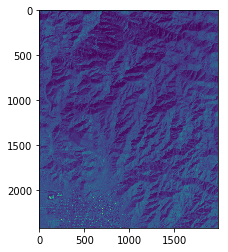

In [ ]:
# Use imshow to load the blue band.
fig = plt.imshow(b)

# Display the results.
plt.show()

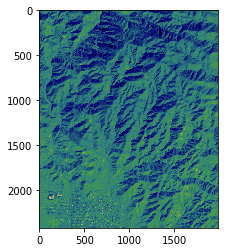

In [ ]:
# Plot the green band using a non-default color ramp.
# https://matplotlib.org/users/colormaps.html
fig = plt.imshow(g)
fig.set_cmap('gist_earth')

# Display the results.
plt.show()


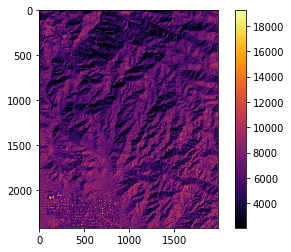

In [ ]:
# Plot the red band and add a color bar.

fig = plt.imshow(r)
fig.set_cmap('inferno')
plt.colorbar()

# Display the results.
plt.show()

In [ ]:
# Finally, plot the NIR band.
fig = plt.imshow(n)
fig.set_cmap('winter')
plt.colorbar()

# Since the axis labels are useless here, let's turn them off.
plt.axis('off')

# Display the results.
plt.show()